In [1]:
import numpy as np
import pandas as pd
import os as os
import streamlit as st

In [2]:
file_path = r'C:\Users\hakim\Desktop\UiTM\2. Degree\sem 6\CSP 650\Project Code\Dataset\styles.csv'
print(os.path.exists(file_path))

True


1. import lib numpy as *np*
2. import pandas numpy as *pd*

*Checking file path....(cell 2)

# Preprocess Data (Define Fuzzy)

In [3]:
# Example: define fuzzy mappings for Price, Comfort, and Color
usage_fuzzy_map = {
    'Casual': (1, 1, 2),           # Casual: Lower bound = 1, Most likely = 1, Upper bound = 2
    'Sports': (1, 2, 3),           # Sports: Lower bound = 1, Most likely = 2, Upper bound = 3
    'Ethnic': (2, 3, 4),           # Ethnic: Lower bound = 2, Most likely = 3, Upper bound = 4
    'Formal': (3, 4, 5),           # Formal: Lower bound = 3, Most likely = 4, Upper bound = 5
    'Smart Casual': (4, 5, 6),     # Smart Casual: Lower bound = 4, Most likely = 5, Upper bound = 6
    'Party': (5, 6, 7),            # Party: Lower bound = 5, Most likely = 6, Upper bound = 7
    'Travel': (6, 7, 8),           # Travel: Lower bound = 6, Most likely = 7, Upper bound = 8
    'Home': (7, 8, 9)              # Home: Lower bound = 7, Most likely = 8, Upper bound = 9
}

gender_fuzzy_map = {
    "Men": (1, 1, 2),              # Men: Lower bound = 1, Most likely = 1, Upper bound = 2
    "Women": (2, 3, 4),            # Women: Lower bound = 2, Most likely = 3, Upper bound = 4
    "Boys": (2, 3, 4),             # Boys: Lower bound = 2, Most likely = 3, Upper bound = 4
    "Girls": (3, 4, 5),            # Girls: Lower bound = 3, Most likely = 4, Upper bound = 5
    "Unisex": (4, 5, 6)            # Unisex: Lower bound = 4, Most likely = 5, Upper bound = 6
}

color_fuzzy_map = {
    'Black': (1, 1, 2),
    'Blue': (2, 3, 4),
    'Brown': (3, 4, 5),
    'Gold': (4, 5, 6),
    'Green': (5, 6, 7),
    'Grey': (6, 7, 8),
    'Khaki': (7, 8, 9),
    'Lavender': (8, 9, 10),
    'Magenta': (9, 10, 11),
    'Maroon': (10, 11, 12),
    'Navy Blue': (11, 12, 13),
    'Orange': (12, 13, 14),
    'Peach': (13, 14, 15),
    'Pink': (14, 15, 16),
    'Purple': (15, 16, 17),
    'Red': (16, 17, 18),
    'Turquoise Blue': (17, 18, 19),
    'White': (18, 19, 20),
    'Yellow': (19, 20, 21)
}



# Function to load, process the dataset, and save to a new file
def load_and_process_data(file_path, output_file):
    # Load the dataset from a CSV file
    df = pd.read_csv(file_path)
    
##-----------------Preprocess Data------------    
    # Drop unnamed columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
   

    # Count duplicates based on 'id' and 'productDisplayName' before removal
    duplicates_count = df.duplicated(subset=['id', 'productDisplayName']).sum()
    print(f"Number of duplicate rows removed: {duplicates_count}")
    
    # Remove duplicates based on 'id' and 'productDisplayName'
    df = df.drop_duplicates(subset=['id', 'productDisplayName'])

##-----------------Preprocess Data-------------   
    
    df['Usage_Fuzzy'] = df['usage'].map(usage_fuzzy_map)
    df['Gender_Fuzzy'] = df['gender'].map(gender_fuzzy_map)
    df['Color_Fuzzy'] = df['baseColour'].map(color_fuzzy_map)
    
    # Replace null values with 'NULL' in all columns except the fuzzy-mapped columns
    Replace_Null = df.columns.difference(['Usage_Fuzzy', 'Gender_Fuzzy', 'Color_Fuzzy'])
    df[Replace_Null] = df[Replace_Null].fillna('NULL')
    Count_Null = df[Replace_Null].isna().sum().sum()
    print(f"Number of NaN values replaced by 'NULL': {Count_Null}")
    print(" ")

    # Save the processed DataFrame with all original columns plus Color_Fuzzy
    df.to_csv(output_file, index=False)

    return df

# Example usage
file_path = r'C:\Users\hakim\Desktop\UiTM\2. Degree\sem 6\CSP 650\Project Code\Dataset\styles.csv'  # Input file path
output_file = r'C:\Users\hakim\Desktop\UiTM\2. Degree\sem 6\CSP 650\Project Code\Dataset\processed_styles.csv'  # Output file path

processed_data = load_and_process_data(file_path, output_file)

# Display the fuzzy numbers for each criterion
print(processed_data[['Usage_Fuzzy', 'Gender_Fuzzy', 'Color_Fuzzy']])

Number of duplicate rows removed: 0
Number of NaN values replaced by 'NULL': 0
 
      Usage_Fuzzy Gender_Fuzzy   Color_Fuzzy
0       (1, 1, 2)    (1, 1, 2)  (11, 12, 13)
1       (1, 1, 2)    (1, 1, 2)     (2, 3, 4)
2       (1, 1, 2)    (2, 3, 4)           NaN
3       (1, 1, 2)    (1, 1, 2)     (1, 1, 2)
4       (1, 1, 2)    (1, 1, 2)     (6, 7, 8)
...           ...          ...           ...
44441   (1, 1, 2)    (1, 1, 2)  (18, 19, 20)
44442   (1, 1, 2)    (1, 1, 2)  (16, 17, 18)
44443   (1, 1, 2)    (1, 1, 2)     (2, 3, 4)
44444   (1, 1, 2)    (2, 3, 4)     (2, 3, 4)
44445   (1, 1, 2)    (2, 3, 4)  (14, 15, 16)

[44446 rows x 3 columns]


2. This cell is to define those data in the dataset and convert it into Fuzzy number

ex: Item 1 (Price: RM 50, Style: 7 and comfort: 8)
* The Style and comfort is a scale from 1-10, so the input must be the same....
* criteria chosen is price, color, usage (Casual, Formal, sports....), gender

## Split Data 80% (training) 20% (Testing)

In [4]:
# Step 2: Define Pairwise Comparison Matrix for Criteria (User Input)
# The user compares each criterion in pairs (Price vs Style, Price vs Comfort, etc.)

#SPLIT DATA 80% AND 20%
import random

# Load the processed data
file_path = r'C:\Users\hakim\Desktop\UiTM\2. Degree\sem 6\CSP 650\Project Code\Dataset\processed_styles.csv'
data = pd.read_csv(file_path)

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # `frac=1` means shuffle all rows

# Define the split ratio
split_ratio = 0.8  # 80% training, 20% testing
split_index = int(len(data) * split_ratio)

# Split the data manually
train_data = data[:split_index]
test_data = data[split_index:]

# Save the training and test datasets (optional)
train_data.to_csv('training_data.csv', index=False)
test_data.to_csv('testing_data.csv', index=False)

# Print the number of records in each set
print(f"Training data: {len(train_data)} rows")
print(f"Testing data: {len(test_data)} rows")


Training data: 35556 rows
Testing data: 8890 rows


## Define Pairwise Comparison "matrix" (For performance evaluation only)

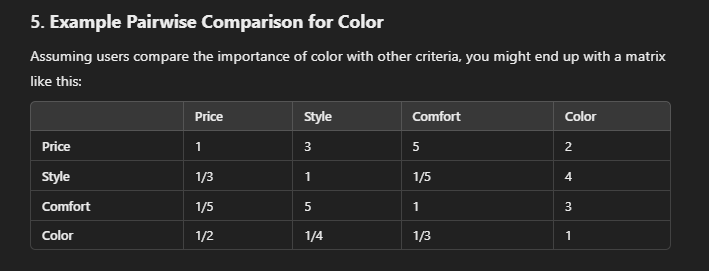

3. This cell is to get input from user for pairwise comparison between the dataset and the input. 
    
    * all data collected needed to convert into Fuzzy number. (Text also need to be convert)
    * Fuzzy: The comparison between the criteria in needed as it is a form of Fuzzy (Price vs Price, Price vs Style, Price vs Comfort)
    
    **This shows on how important those questions to user between the criteria/attribute** 
    * AHP: Givng the expantion of not using a whole number such as 1-10 and 1.5, 2.8, 5.2 etc... is possible
    * The image above shows the pairwise comparison between those criteria/attribute (Added color)
Therefore, Fuzzy Analytic Hierarchy Process (FAHP) is done... 

In [5]:
# Example Pairwise Comparison Matrix for Usage, Gender, Color
print("Comparison Matrix (Hakim)")
pairwise_matrix = np.array([
    [1, 3, 1/3],  # usage vs usage , usage vs gender, usage vs Color
    [1/3, 1, 1/5],  # Gender vs usage, Gender vs gender, gender vs color 
    [3, 5, 1]   # Color vs usage, Color vs gender, Color vs Color
])


# Show the matrix
print(pairwise_matrix)

Comparison Matrix (Hakim)
[[1.         3.         0.33333333]
 [0.33333333 1.         0.2       ]
 [3.         5.         1.        ]]


### 1. Sum up each column and nomalize it

In [6]:
# Step 1: Calculate column sums using a loop
col_sums = []
for col in range(pairwise_matrix.shape[1]):
    column_sum = 0
    for row in range(pairwise_matrix.shape[0]):
        column_sum += pairwise_matrix[row, col]
    col_sums.append(column_sum)
    
print("\nColumn Sums:")
print(col_sums)

# Step 2: Normalize the matrix by dividing each element in the column by the column's sum using a loop
normalized_matrix = np.zeros_like(pairwise_matrix, dtype=float)
for i in range(pairwise_matrix.shape[0]):  # Loop over rows
    for j in range(pairwise_matrix.shape[1]):  # Loop over columns
        normalized_matrix[i, j] = pairwise_matrix[i, j] / col_sums[j]
        
print("\nNormalized Matrix:")
print(normalized_matrix)


Column Sums:
[4.333333333333333, 9.0, 1.5333333333333332]

Normalized Matrix:
[[0.23076923 0.33333333 0.2173913 ]
 [0.07692308 0.11111111 0.13043478]
 [0.69230769 0.55555556 0.65217391]]


### 2. calculate Fuzzy Weight (row)

In [7]:
# Step 3: Calculate the fuzzy weights by averaging each row in the normalized matrix using a loop
fuzzy_weights = []
for i in range(normalized_matrix.shape[0]):
    row_sum = 0
    for j in range(normalized_matrix.shape[1]):
        row_sum += normalized_matrix[i, j]
    fuzzy_weights.append(row_sum / normalized_matrix.shape[1])
    
print("\nFuzzy Weights (Average of Each Row):")
print(fuzzy_weights)


Fuzzy Weights (Average of Each Row):
[0.26049795615013005, 0.1061563235476279, 0.633345720302242]


### 3. Defuzzification (Crisp Value)

In [13]:
## Defuzzification function
def defuzzify(fuzzy_weights):
    # Fuzzy values are in the form of (L, M, R) (Lower, Middle, Upper)
    L, M, R = fuzzy_weights
    crisp_value = (L + 4 * M + R) / 60
    return crisp_value

# Step 5: Define fuzzy weights for Price, Style, Comfort (for example purposes)
# Assuming fuzzy values for Price, Style, Comfort are as below:
fuzzy_usage_weight = (3, 5, 7)  # Example: Price fuzzy values (L, M, R)
fuzzy_gender_weight = (4, 6, 8)  # Example: Style fuzzy values (L, M, R)
fuzzy_color_weight = (2, 5, 6)  # Example: Comfort fuzzy values (L, M, R)

# Defuzzifying the fuzzy weights
defuzzified_usage_weight = defuzzify(fuzzy_usage_weight)
defuzzified_gender_weight = defuzzify(fuzzy_gender_weight)
defuzzified_color_weight = defuzzify(fuzzy_color_weight)

print("Defuzzified Price Weight:", defuzzified_usage_weight)
print("Defuzzified Style Weight:", defuzzified_gender_weight)
print("Defuzzified Comfort Weight:", defuzzified_color_weight)

Defuzzified Price Weight: 0.5
Defuzzified Style Weight: 0.6
Defuzzified Comfort Weight: 0.4666666666666667


### Calculate ranking scores (Dataset) and Recommends

In [15]:
# Step 1: Define defuzzified weights (replace these with your calculated defuzzified weights)
defuzzified_weights = {
    'Usage':  defuzzified_usage_weight,      # Example weight for Price
    'Gender': defuzzified_gender_weight,      # Example weight for Style
    'Color': defuzzified_color_weight     # Example weight for Comfort
}

# Step 2: Load Preprocessed Dataset with Fuzzy Values (Usage, gener and color)

file_path = r'C:\Users\hakim\Desktop\UiTM\2. Degree\sem 6\CSP 650\Project Code\Dataset\processed_styles.csv'  # Path to your preprocessed dataset
df = pd.read_csv(file_path)
df = pd.DataFrame(data)

# Step 3: Apply Defuzzified Weights to Each Criterion
weighted_fuzzy_scores = []

for index, row in df.iterrows():
    # Extract fuzzy values for each criterion
    usage_fuzzy = row['Usage_Fuzzy']
    gender_fuzzy = row['Gender_Fuzzy']
    color_fuzzy = row['Color_Fuzzy']
    
    # Apply weights to each fuzzy number
    weighted_price = tuple(w * defuzzified_weights['Usage_Fuzzy'] for w in usage_fuzzy)
    weighted_style = tuple(w * defuzzified_weights['Gender_Fuzzy'] for w in gender_fuzzy)
    weighted_comfort = tuple(w * defuzzified_weights['Color_Fuzzy'] for w in color_fuzzy)
    
    # Combine weighted fuzzy scores element-wise
    combined_fuzzy = tuple(
        weighted_price[i] + weighted_style[i] + weighted_comfort[i]
        for i in range(3)  # L, M, R positions
    )
    
    # Defuzzify the combined fuzzy score
    crisp_score = defuzzify(combined_fuzzy)
    weighted_fuzzy_scores.append(crisp_score)

# Step 4: Add Defuzzified Scores to the DataFrame
df['Defuzzified_Score'] = weighted_fuzzy_scores

# Step 5: Rank Items Based on Defuzzified Scores
df = df.sort_values(by='Defuzzified_Score', ascending=False).reset_index(drop=True)

# Display the Final Recommendation
print("Final Recommendations Based on Defuzzified Scores:")
print(df[['Item', 'Defuzzified_Score']])


KeyError: 'Usage_Fuzzy'

4. This cell shows the weights that are calculated into Fuzzy number from the user input from (3)

the explaination for the calculation are later on....

In [ ]:
# Step 4: Apply the FAHP Weights to the Alternatives
def rank_alternatives(alternatives, criteria_weights):
    scores = {}
    for item, attributes in alternatives.items():
        score = 0
        for i, criterion in enumerate(criteria):
            score += attributes[criterion] * criteria_weights[i]  # Weighted score based on user-defined weights
        scores[item] = score
    return scores

5. This cell is for applying the weight (input) that have been calculated into the dataset

In [ ]:
# Rank fashion items based on criteria weights
ranked_items = rank_alternatives(Dataset, weights)
ranked_items = sorted(ranked_items.items(), key=lambda x: x[1], reverse=True)

print("\nRanked Items (from best to worst):")
for item, score in ranked_items:
    print(f"{item}: {score:.2f}")

5. This cell is for the ranking (recommended items) and the output

Thanks for you time....